# Исследование для АНО "Простые вещи"

Цель исследования - подготовка аналитической панели, отображающей особенности поведения пользователей, для АНО "Простые вещи".

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0970fd94e499b168eaf94363f745704a132ee3ee853e1f98c1ad77b85c61abbd
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from ydata_profiling import ProfileReport
import warnings

In [ ]:
total = pd.read_excel('/content/correct_payments.xlsx', index_col = 0)
total.head()

id          action_date      bank              site  order_id  \
0  2122072170  2024-06-30 22:18:00  Тинькофф  prostieveschi.ru       NaN   
1  2122055914  2024-06-30 20:18:00  Тинькофф  prostieveschi.ru       NaN   
2  2122054093  2024-06-30 20:06:00  Тинькофф  prostieveschi.ru       NaN   
3  2122024440                  NaN  Тинькофф  prostieveschi.ru   22719.0   
4  2122023264                  NaN  Тинькофф  prostieveschi.ru       NaN   

                customer               type  operation_sum operation_currency  \
0    tigro****@gmail.com  Регулярная оплата            200                RUB   
1      12ost****@mail.ru  Регулярная оплата           1000                RUB   
2        olk****@mail.ru  Регулярная оплата            500                RUB   
3  yana.ba****@gmail.com             Оплата            200                RUB   
4   Ekhisa****@gmail.com  Регулярная оплата           1000                RUB   

   comission_sum  final_sum final_currency     status  \
0            6.4      193.6            RUB  Завершена   
1           32.0      968.0            RUB  Завершена   
2           16.0      484.0            RUB  Завершена   
3            NaN        NaN            NaN  Отклонена   
4            0.5       -0.5            RUB  Отклонена   

                         aim  comission_perc      file  
0  Поддержите "Простые вещи"             3.2  июнь.xls  
1  Поддержите "Простые вещи"             3.2  июнь.xls  
2  Поддержите "Простые вещи"             3.2  июнь.xls  
3  Поддержите "Простые вещи"             3.2  июнь.xls  
4  Поддержите "Простые вещи"             3.2  июнь.xls

## Предобработка данных

In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4148 entries, 0 to 828
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4148 non-null   int64  
 1   action_date         3496 non-null   object 
 2   bank                4148 non-null   object 
 3   site                4148 non-null   object 
 4   order_id            1281 non-null   float64
 5   customer            4147 non-null   object 
 6   type                4148 non-null   object 
 7   operation_sum       4148 non-null   int64  
 8   operation_currency  4148 non-null   object 
 9   comission_sum       4086 non-null   float64
 10  final_sum           4086 non-null   float64
 11  final_currency      4086 non-null   object 
 12  status              4148 non-null   object 
 13  aim                 3475 non-null   object 
 14  comission_perc      4148 non-null   float64
 15  file                4148 non-null   object 
dtypes: float64(4

В столбце `action_date` много пропусков. Данные этого столбца имеют ненадлежащий тип.

In [ ]:
total.duplicated().sum()

0

Строк-дубликатов нет.

In [ ]:
total.duplicated(subset='id').sum()

0

Записей об одинаковых событиях нет.

In [ ]:
total[total['action_date'] == ' ']

id action_date      bank              site  order_id  \
256  2080076756              Тинькофф  prostieveschi.ru       NaN   
257  2079609225              Тинькофф  prostieveschi.ru       NaN   
258  2079397292              Тинькофф  prostieveschi.ru       NaN   
259  2079100030              Тинькофф  prostieveschi.ru       NaN   
260  2078923096              Тинькофф  prostieveschi.ru       NaN   
..          ...         ...       ...               ...       ...   
333  2081555587              Тинькофф  prostieveschi.ru       NaN   
334  2081267628              Тинькофф  prostieveschi.ru       NaN   
335  2081219464              Тинькофф  prostieveschi.ru       NaN   
336  2080715012              Тинькофф  prostieveschi.ru       NaN   
337  2080563077              Тинькофф  prostieveschi.ru       NaN   

                         customer               type  operation_sum  \
256   feoktistovaan****@gmail.com  Регулярная оплата            500   
257   feoktistovaan****@gmail.com  Регулярная оплата            500   
258           polinch****@list.ru  Регулярная оплата            150   
259  valeriyavarvar****@gmail.com  Регулярная оплата            500   
260           polinch****@list.ru  Регулярная оплата            150   
..                            ...                ...            ...   
333          larika****@gmail.com  Регулярная оплата            800   
334             ett****@yandex.ru  Регулярная оплата            500   
335         anna-pime****@mail.ru  Регулярная оплата            500   
336         anna-pime****@mail.ru  Регулярная оплата            500   
337   feoktistovaan****@gmail.com  Регулярная оплата            500   

    operation_currency  comission_sum  final_sum final_currency     status  \
256                RUB            0.5       -0.5            RUB  Отклонена   
257                RUB            0.5       -0.5            RUB  Отклонена   
258                RUB            0.5       -0.5            RUB  Отклонена   
259                RUB            0.5       -0.5            RUB  Отклонена   
260                RUB            0.5       -0.5            RUB  Отклонена   
..                 ...            ...        ...            ...        ...   
333                RUB            0.5       -0.5            RUB  Отклонена   
334                RUB            0.5       -0.5            RUB  Отклонена   
335                RUB            0.5       -0.5            RUB  Отклонена   
336                RUB            0.5       -0.5            RUB  Отклонена   
337                RUB            0.5       -0.5            RUB  Отклонена   

     aim  comission_perc         file  
256  NaN             3.2   январь.xls  
257  NaN             3.2   январь.xls  
258  NaN             3.2   январь.xls  
259  NaN             3.2   январь.xls  
260  NaN             3.2   январь.xls  
..   ...             ...          ...  
333  NaN             3.2  февраль.xls  
334  NaN             3.2  февраль.xls  
335  NaN             3.2  февраль.xls  
336  NaN             3.2  февраль.xls  
337  NaN             3.2  февраль.xls  

[169 rows x 16 columns]

В столбце `action_date` присутствуют ячейки, заполненные пробелами. Удалим.

In [ ]:
total = total[total['action_date'] != ' ']
display(total.head())
total.info()

id          action_date      bank              site  order_id  \
0  2122072170  2024-06-30 22:18:00  Тинькофф  prostieveschi.ru       NaN   
1  2122055914  2024-06-30 20:18:00  Тинькофф  prostieveschi.ru       NaN   
2  2122054093  2024-06-30 20:06:00  Тинькофф  prostieveschi.ru       NaN   
3  2122024440                  NaN  Тинькофф  prostieveschi.ru   22719.0   
4  2122023264                  NaN  Тинькофф  prostieveschi.ru       NaN   

                customer               type  operation_sum operation_currency  \
0    tigro****@gmail.com  Регулярная оплата            200                RUB   
1      12ost****@mail.ru  Регулярная оплата           1000                RUB   
2        olk****@mail.ru  Регулярная оплата            500                RUB   
3  yana.ba****@gmail.com             Оплата            200                RUB   
4   Ekhisa****@gmail.com  Регулярная оплата           1000                RUB   

   comission_sum  final_sum final_currency     status  \
0            6.4      193.6            RUB  Завершена   
1           32.0      968.0            RUB  Завершена   
2           16.0      484.0            RUB  Завершена   
3            NaN        NaN            NaN  Отклонена   
4            0.5       -0.5            RUB  Отклонена   

                         aim  comission_perc      file  
0  Поддержите "Простые вещи"             3.2  июнь.xls  
1  Поддержите "Простые вещи"             3.2  июнь.xls  
2  Поддержите "Простые вещи"             3.2  июнь.xls  
3  Поддержите "Простые вещи"             3.2  июнь.xls  
4  Поддержите "Простые вещи"             3.2  июнь.xls

<class 'pandas.core.frame.DataFrame'>
Index: 3979 entries, 0 to 4147
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3979 non-null   int64  
 1   action_date         3327 non-null   object 
 2   bank                3979 non-null   object 
 3   site                3979 non-null   object 
 4   order_id            1281 non-null   float64
 5   customer            3978 non-null   object 
 6   type                3979 non-null   object 
 7   operation_sum       3979 non-null   int64  
 8   operation_currency  3979 non-null   object 
 9   comission_sum       3917 non-null   float64
 10  final_sum           3917 non-null   float64
 11  final_currency      3917 non-null   object 
 12  status              3979 non-null   object 
 13  aim                 3475 non-null   object 
 14  comission_perc      3979 non-null   float64
 15  file                3979 non-null   object 
dtypes: float64(

In [ ]:
# приведём столбец action_date к типу datetime
total['action_date'] = pd.to_datetime(total['action_date'])
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3979 entries, 0 to 4147
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  3979 non-null   int64         
 1   action_date         3327 non-null   datetime64[ns]
 2   bank                3979 non-null   object        
 3   site                3979 non-null   object        
 4   order_id            1281 non-null   float64       
 5   customer            3978 non-null   object        
 6   type                3979 non-null   object        
 7   operation_sum       3979 non-null   int64         
 8   operation_currency  3979 non-null   object        
 9   comission_sum       3917 non-null   float64       
 10  final_sum           3917 non-null   float64       
 11  final_currency      3917 non-null   object        
 12  status              3979 non-null   object        
 13  aim                 3475 non-null   object        
 1

In [ ]:
total['final_currency'].unique()

array(['RUB', nan], dtype=object)

Итоговые суммы всех транзакций указаны в рублях.

In [ ]:
total['status'].unique()

array(['Завершена', 'Отклонена'], dtype=object)

Статусы транзакций единообразны.

## Разведочный анализ данных

In [ ]:
# используем ProfileReport для разведочного анализа
ProfileReport(total)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

(0.0, 10000.0)

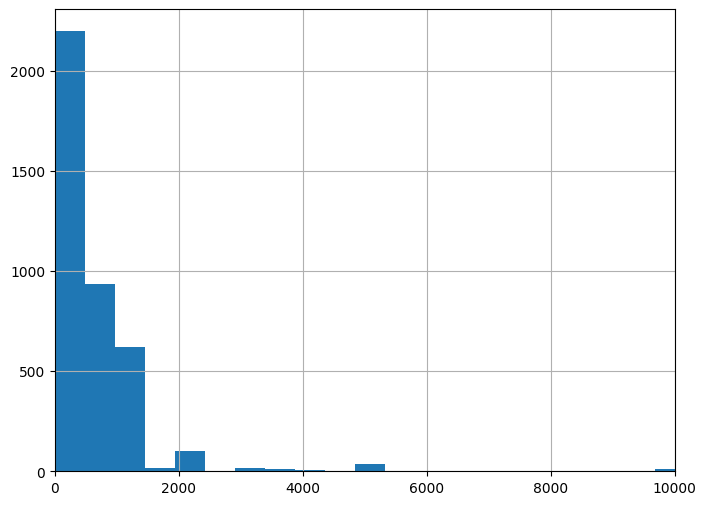

In [ ]:
# изучим распределение сумм транзакций
sum_by_action = total.groupby('id', as_index=False)['final_sum'].sum()
sum_by_action['final_sum'].hist(bins=100, figsize=(8, 6))
plt.xlim(0, 10000)

In [ ]:
# найдём перцентили сумм транзакций
np.percentile(sum_by_action['final_sum'], [90, 95, 99.9])

array([  968.,  1936., 48400.])

In [ ]:
# удалим записи о транзакциях на сумму больше 484000 рублей
total_p = total.loc[total['final_sum'] < 484000]
total_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3917 entries, 0 to 4147
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  3917 non-null   int64         
 1   action_date         3327 non-null   datetime64[ns]
 2   bank                3917 non-null   object        
 3   site                3917 non-null   object        
 4   order_id            1221 non-null   float64       
 5   customer            3916 non-null   object        
 6   type                3917 non-null   object        
 7   operation_sum       3917 non-null   int64         
 8   operation_currency  3917 non-null   object        
 9   comission_sum       3917 non-null   float64       
 10  final_sum           3917 non-null   float64       
 11  final_currency      3917 non-null   object        
 12  status              3917 non-null   object        
 13  aim                 3413 non-null   object        
 1

## RFM-анализ

RFM-анализ - это разделение клиентов на сегменты в зависимости от давности последнего действия, частоты действий и принесённой выручки. Показатели оцениваются от 1 до 3.

In [ ]:
# сохраним для RFM-анализа данные о транзакциях, не имеющие пропусков в столбцах customer, status и action_date
for_rfm = total_p[(~total_p['customer'].isna()) & (total_p['status'] != 'Отклонена') & (~total_p['action_date'].isna())]
display(for_rfm.head())
for_rfm.info()

id         action_date      bank              site  order_id  \
0  2122072170 2024-06-30 22:18:00  Тинькофф  prostieveschi.ru       NaN   
1  2122055914 2024-06-30 20:18:00  Тинькофф  prostieveschi.ru       NaN   
2  2122054093 2024-06-30 20:06:00  Тинькофф  prostieveschi.ru       NaN   
5  2122017551 2024-06-30 16:17:00  Тинькофф  prostieveschi.ru   22715.0   
6  2122014201 2024-06-30 15:56:00  Тинькофф  prostieveschi.ru       NaN   

              customer                         type  operation_sum  \
0  tigro****@gmail.com            Регулярная оплата            200   
1    12ost****@mail.ru            Регулярная оплата           1000   
2      olk****@mail.ru            Регулярная оплата            500   
5   iav****@icloud.com  Оплата с созданием подписки            500   
6    kho****@yandex.ru            Регулярная оплата            500   

  operation_currency  comission_sum  final_sum final_currency     status  \
0                RUB            6.4      193.6            RUB  Завершена   
1                RUB           32.0      968.0            RUB  Завершена   
2                RUB           16.0      484.0            RUB  Завершена   
5                RUB           16.0      484.0            RUB  Завершена   
6                RUB           16.0      484.0            RUB  Завершена   

                         aim  comission_perc      file  
0  Поддержите "Простые вещи"             3.2  июнь.xls  
1  Поддержите "Простые вещи"             3.2  июнь.xls  
2  Поддержите "Простые вещи"             3.2  июнь.xls  
5  Поддержите "Простые вещи"             3.2  июнь.xls  
6  Поддержите "Простые вещи"             3.2  июнь.xls

<class 'pandas.core.frame.DataFrame'>
Index: 3326 entries, 0 to 4145
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  3326 non-null   int64         
 1   action_date         3326 non-null   datetime64[ns]
 2   bank                3326 non-null   object        
 3   site                3326 non-null   object        
 4   order_id            1167 non-null   float64       
 5   customer            3326 non-null   object        
 6   type                3326 non-null   object        
 7   operation_sum       3326 non-null   int64         
 8   operation_currency  3326 non-null   object        
 9   comission_sum       3326 non-null   float64       
 10  final_sum           3326 non-null   float64       
 11  final_currency      3326 non-null   object        
 12  status              3326 non-null   object        
 13  aim                 2822 non-null   object        
 1

In [ ]:
# скопируем полученные данные для когортного анализа
cohorts = for_rfm.copy()

In [ ]:
# создадим таблицу со значениями recency, frequency и monetary value для каждого пользователя
max_date = for_rfm['action_date'].max() + dt.timedelta(days=1)

rfm_table = for_rfm.groupby('customer', as_index=False).agg({'action_date': lambda x: (max_date - x.max()).days,
                                                             'id': lambda x: len(x.unique()),
                                                             'final_sum': lambda x: x.sum()})

rfm_table.rename(columns={'action_date': 'recency', 'id': 'frequency', 'final_sum': 'monetary_value'}, inplace=True)
rfm_table.head()

customer  recency  frequency  monetary_value
0      ****@bk.ru       49          1           968.0
1      ****@de.ru       28          1           968.0
2     ****@eml.cc        3          2          1452.0
3  ****@gksnab.ru       85          1          2420.0
4  ****@gmail.com       47          1            96.1

In [ ]:
recency_scores = [3,2,1]
frequency_scores = [1,2,3]
monetary_scores = [1,2,3]

In [ ]:
rfm_table['recency_score'] = pd.cut(rfm_table['recency'], bins = 3, labels = recency_scores)
rfm_table['frequency_score'] = pd.cut(rfm_table['frequency'], bins = 3, labels = frequency_scores)
rfm_table['monetary_score'] = pd.cut(rfm_table['monetary_value'], bins = 3, labels = monetary_scores)
rfm_table.head()

customer  recency  frequency  monetary_value recency_score  \
0      ****@bk.ru       49          1           968.0             3   
1      ****@de.ru       28          1           968.0             3   
2     ****@eml.cc        3          2          1452.0             3   
3  ****@gksnab.ru       85          1          2420.0             2   
4  ****@gmail.com       47          1            96.1             3   

  frequency_score monetary_score  
0               1              1  
1               1              1  
2               1              1  
3               1              1  
4               1              1

In [ ]:
# определим сегмент RFM для каждого клиента
rfm_table['rfm_score'] = (rfm_table['recency_score'].astype(str)
                          + rfm_table['frequency_score'].astype(str)
                          + rfm_table['monetary_score'].astype(str))

rfm_table['rfm_score'] = rfm_table['rfm_score'].astype(int)
rfm_table.head()

customer  recency  frequency  monetary_value recency_score  \
0      ****@bk.ru       49          1           968.0             3   
1      ****@de.ru       28          1           968.0             3   
2     ****@eml.cc        3          2          1452.0             3   
3  ****@gksnab.ru       85          1          2420.0             2   
4  ****@gmail.com       47          1            96.1             3   

  frequency_score monetary_score  rfm_score  
0               1              1        311  
1               1              1        311  
2               1              1        311  
3               1              1        211  
4               1              1        311

In [ ]:
# добавим данные о сегментах к общим данным
for_rfm = for_rfm.merge(rfm_table, on='customer', how='left')
for_rfm.head()

id         action_date      bank              site  order_id  \
0  2122072170 2024-06-30 22:18:00  Тинькофф  prostieveschi.ru       NaN   
1  2122055914 2024-06-30 20:18:00  Тинькофф  prostieveschi.ru       NaN   
2  2122054093 2024-06-30 20:06:00  Тинькофф  prostieveschi.ru       NaN   
3  2122017551 2024-06-30 16:17:00  Тинькофф  prostieveschi.ru   22715.0   
4  2122014201 2024-06-30 15:56:00  Тинькофф  prostieveschi.ru       NaN   

              customer                         type  operation_sum  \
0  tigro****@gmail.com            Регулярная оплата            200   
1    12ost****@mail.ru            Регулярная оплата           1000   
2      olk****@mail.ru            Регулярная оплата            500   
3   iav****@icloud.com  Оплата с созданием подписки            500   
4    kho****@yandex.ru            Регулярная оплата            500   

  operation_currency  comission_sum  ...                        aim  \
0                RUB            6.4  ...  Поддержите "Простые вещи"   
1                RUB           32.0  ...  Поддержите "Простые вещи"   
2                RUB           16.0  ...  Поддержите "Простые вещи"   
3                RUB           16.0  ...  Поддержите "Простые вещи"   
4                RUB           16.0  ...  Поддержите "Простые вещи"   

  comission_perc      file recency  frequency monetary_value  recency_score  \
0            3.2  июнь.xls       1          7         1355.2              3   
1            3.2  июнь.xls       1          7         6776.0              3   
2            3.2  июнь.xls       2          3         1452.0              3   
3            3.2  июнь.xls       2          2          968.0              3   
4            3.2  июнь.xls       2          3         1452.0              3   

   frequency_score  monetary_score rfm_score  
0                1               1       311  
1                1               1       311  
2                1               1       311  
3                1               1       311  
4                1               1       311  

[5 rows x 23 columns]

In [ ]:
# сохраним файл с сегментом каждого пользователя
for_rfm.to_excel('rfm.xlsx')

In [ ]:
# создадим сводную таблицу с численностью и общей суммой пожертвований каждого сегмента
rfm_pivot = for_rfm.pivot_table(index = 'rfm_score',
                                values=['customer', 'final_sum'],
                                aggfunc={'customer': 'nunique',
                                         'final_sum': 'sum'})

rfm_pivot

customer   final_sum
rfm_score                      
111              37    22868.94
211              94   121690.15
213               1   145200.00
231               1     4646.40
311            1326  1920287.52
312               2   126808.00
321              11    93147.99
331               4    23662.70

Клиенты разделены на 8 сегментов. Наибольший по численности сегмент 311 - клиенты с наименьшей давностью последнего действия, наименьшей частотой действий и наименьшей принесённой выручкой.

### Когортный анализ

Далее будет произведён анализ маркетинговых метрик по когортам клиентов.

In [ ]:
def get_profiles(df):

    """
    Функция возвращает датафрейм с датой, временем и месяцем первого визита
    для каждого пользователя
    """

    profiles = (
        df.sort_values(by=['customer', 'action_date'])
        .groupby('customer')
        .agg({'action_date': 'first'})
        .rename(columns={'action_date': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period("M")

    return profiles

In [ ]:
profs = get_profiles(cohorts)
profs.head()

customer            first_ts          dt    month
0      ****@bk.ru 2024-06-13 18:33:00  2024-06-13  2024-06
1      ****@de.ru 2024-07-04 16:36:00  2024-07-04  2024-07
2     ****@eml.cc 2024-06-17 14:33:00  2024-06-17  2024-06
3  ****@gksnab.ru 2024-05-07 22:50:00  2024-05-07  2024-05
4  ****@gmail.com 2024-06-15 01:47:00  2024-06-15  2024-06

In [ ]:
cohorts = cohorts.merge(profs, on='customer', how='left')
cohorts.head()

id         action_date      bank              site  order_id  \
0  2122072170 2024-06-30 22:18:00  Тинькофф  prostieveschi.ru       NaN   
1  2122055914 2024-06-30 20:18:00  Тинькофф  prostieveschi.ru       NaN   
2  2122054093 2024-06-30 20:06:00  Тинькофф  prostieveschi.ru       NaN   
3  2122017551 2024-06-30 16:17:00  Тинькофф  prostieveschi.ru   22715.0   
4  2122014201 2024-06-30 15:56:00  Тинькофф  prostieveschi.ru       NaN   

              customer                         type  operation_sum  \
0  tigro****@gmail.com            Регулярная оплата            200   
1    12ost****@mail.ru            Регулярная оплата           1000   
2      olk****@mail.ru            Регулярная оплата            500   
3   iav****@icloud.com  Оплата с созданием подписки            500   
4    kho****@yandex.ru            Регулярная оплата            500   

  operation_currency  comission_sum  final_sum final_currency     status  \
0                RUB            6.4      193.6            RUB  Завершена   
1                RUB           32.0      968.0            RUB  Завершена   
2                RUB           16.0      484.0            RUB  Завершена   
3                RUB           16.0      484.0            RUB  Завершена   
4                RUB           16.0      484.0            RUB  Завершена   

                         aim  comission_perc      file            first_ts  \
0  Поддержите "Простые вещи"             3.2  июнь.xls 2024-01-30 22:18:00   
1  Поддержите "Простые вещи"             3.2  июнь.xls 2024-01-31 20:18:00   
2  Поддержите "Простые вещи"             3.2  июнь.xls 2024-05-30 20:05:00   
3  Поддержите "Простые вещи"             3.2  июнь.xls 2024-06-30 16:17:00   
4  Поддержите "Простые вещи"             3.2  июнь.xls 2024-05-31 15:55:00   

           dt    month  
0  2024-01-30  2024-01  
1  2024-01-31  2024-01  
2  2024-05-30  2024-05  
3  2024-06-30  2024-06  
4  2024-05-31  2024-05

In [ ]:
cohorts.to_excel('cohorts.xlsx')

In [ ]:
def get_retention(cohorts, dimensions=[]):

    """
    Функция возвращает коэффициент удержания на каждый lifetime
    для каждой когорты
    """

    cohorts['lifetime'] = cohorts['action_date'].dt.month - cohorts['first_ts'].dt.month

    result_grouped = cohorts.pivot_table(
        index=dimensions,
        columns='lifetime',
        values='customer',
        aggfunc='nunique',
    )
    cohort_sizes = (
        cohorts.groupby(dimensions)
        .agg({'customer': 'nunique'})
        .rename(columns={'customer': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    result_grouped['cohort_size'] = cohort_sizes

    return result_grouped

In [ ]:
# получим таблицу удержания для каждой когорты
retention_tab = get_retention(cohorts, dimensions=['month'])
retention_tab

cohort_size    0         1         2         3         4         5  \
month                                                                         
2024-01          251  1.0  0.916335  0.892430  0.840637  0.844622  0.657371   
2024-02           12  1.0  0.583333  0.750000  0.666667  0.500000  0.583333   
2024-03           52  1.0  0.230769  0.288462  0.173077  0.211538  0.000000   
2024-04           42  1.0  0.309524  0.285714  0.238095  0.000000  0.000000   
2024-05          275  1.0  0.334545  0.356364  0.000000  0.000000  0.000000   
2024-06          698  1.0  0.226361  0.000000  0.000000  0.000000  0.000000   
2024-07          146  1.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                6  
month              
2024-01  0.828685  
2024-02  0.000000  
2024-03  0.000000  
2024-04  0.000000  
2024-05  0.000000  
2024-06  0.000000  
2024-07  0.000000

In [ ]:
# сохраним таблицу удержания как файл
retention_tab.to_excel('retention.xlsx')

In [ ]:
# транспонируем таблицу удержания
retention_tab1 = retention_tab.drop(columns=['cohort_size']).T
retention_tab1.head()

month   2024-01   2024-02   2024-03   2024-04   2024-05   2024-06  2024-07
0      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000      1.0
1      0.916335  0.583333  0.230769  0.309524  0.334545  0.226361      0.0
2      0.892430  0.750000  0.288462  0.285714  0.356364  0.000000      0.0
3      0.840637  0.666667  0.173077  0.238095  0.000000  0.000000      0.0
4      0.844622  0.500000  0.211538  0.000000  0.000000  0.000000      0.0

In [ ]:
# сохраним транспонированную таблицу удержания как файл
retention_tab1.to_excel('retention1.xlsx')

In [ ]:
def get_ltv(cohorts, dimensions=[]):

    """
    Функция возвращает значение lifetime value
    на каждый lifetime для каждой когорты
    """

    cohorts['lifetime'] = cohorts['action_date'].dt.month - cohorts['first_ts'].dt.month

    def group_by_dimensions(df, dims):

        """
        Функция возвращает сумму пожертвований
        по каждой когорте
        """
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='final_sum',
            aggfunc='sum',
        )

        result = result.fillna(0).cumsum(axis=1)

        cohort_sizes = (
            df.groupby(dims)
            .agg({'customer': 'nunique'})
            .rename(columns={'customer': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(cohorts, dimensions)

    return result_grouped

In [ ]:
# получим таблицу LTV для каждой когорты
ltv_tab = get_ltv(cohorts, dimensions=['month'])
ltv_tab.head()

cohort_size            0            1            2            3  \
month                                                                      
2024-01          251   495.588167   963.811394  1408.160518  1869.092908   
2024-02           12   463.775000   758.150000  1100.925000  1435.691667   
2024-03           52  3383.916538  3680.831923  4427.190385  4535.357692   
2024-04           42  1795.521429  2864.914286  3002.032381  3570.084762   
2024-05          275   765.918945   942.553709  1131.174073  1131.174073   

                   4            5            6  
month                                           
2024-01  2370.155179  2773.729960  3267.365697  
2024-02  1730.125000  2032.566667  2032.566667  
2024-03  4818.298077  4818.298077  4818.298077  
2024-04  3570.084762  3570.084762  3570.084762  
2024-05  1131.174073  1131.174073  1131.174073

In [ ]:
# транспонируем таблицу LTV
ltv_tab1 = ltv_tab.drop(columns=['cohort_size']).T
ltv_tab1.head()

month      2024-01      2024-02      2024-03      2024-04      2024-05  \
0       495.588167   463.775000  3383.916538  1795.521429   765.918945   
1       963.811394   758.150000  3680.831923  2864.914286   942.553709   
2      1408.160518  1100.925000  4427.190385  3002.032381  1131.174073   
3      1869.092908  1435.691667  4535.357692  3570.084762  1131.174073   
4      2370.155179  1730.125000  4818.298077  3570.084762  1131.174073   

month      2024-06      2024-07  
0       948.769341  1141.531644  
1      1053.840344  1141.531644  
2      1053.840344  1141.531644  
3      1053.840344  1141.531644  
4      1053.840344  1141.531644

In [ ]:
# сохраним полученные таблицы как файлы
ltv_tab.to_excel('ltv.xlsx')
ltv_tab1.to_excel('ltv1.xlsx')

In [ ]:
# добавим в датафрейм cohorts столбцы с месяцем, днём и неделей транзакции
cohorts['session_month'] = cohorts['action_date'].dt.month
cohorts['session_week'] = cohorts['action_date'].dt.isocalendar().week
cohorts['session_date'] = cohorts['action_date'].dt.date

# рассчитаем DAU, MAU, WAU и sticky factor
dau_total = int(cohorts.groupby('session_date').agg({'customer': 'nunique'}).mean())
wau_total = int(cohorts.groupby('session_week').agg({'customer': 'nunique'}).mean())
mau_total = int(cohorts.groupby('session_month').agg({'customer': 'nunique'}).mean())
sticky_factor_m = dau_total / mau_total * 100

print('DAU:', dau_total)
print('WAU:', wau_total)
print('MAU:', mau_total)
print('Sticky factor:', sticky_factor_m)

DAU: 15
WAU: 105
MAU: 456
Sticky factor: 3.289473684210526


<ipython-input-43-cc701db814aa>:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  dau_total = int(cohorts.groupby('session_date').agg({'customer': 'nunique'}).mean())
<ipython-input-43-cc701db814aa>:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  wau_total = int(cohorts.groupby('session_week').agg({'customer': 'nunique'}).mean())
<ipython-input-43-cc701db814aa>:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  mau_total = int(cohorts.groupby('session_month').agg({'customer': 'nunique'}).mean())


Среднее количество активных пользователей в день - 15, в неделю - 105, в месяц - 456.

LTV и коэффициент удержания получены в таблицах.

Дальнейшая работа с данными будет проведена в Yandex DataLens. [Ссылка на дашборд](https://datalens.yandex/feiu8as4bn2a1)